In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [24]:
lenet5model = tf.keras.Sequential()
lenet5model.add(tf.keras.Input(shape=(32,32,3)))
lenet5model.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', padding="same", name="ConvolutionalLayer1"))
lenet5model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, name="AveragePooling1"))
lenet5model.add(tf.keras.layers.Conv2D(16,kernel_size=(5, 5), activation='tanh', name="ConvolutionalLayer2"))
lenet5model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, name="AveragePooling2"))
lenet5model.add(tf.keras.layers.Flatten(name="Input"))
lenet5model.add(tf.keras.layers.Dense(units=120, activation='tanh', name="HiddenLayer1"))
lenet5model.add(tf.keras.layers.Dense(units=84, activation='tanh', name="HiddenLayer2"))
lenet5model.add(tf.keras.layers.Dense(units=10, activation = 'softmax', name="Output"))
lenet5model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionalLayer1 (Conv2D  (None, 32, 32, 6)        456       
 )                                                               
                                                                 
 AveragePooling1 (AveragePoo  (None, 16, 16, 6)        0         
 ling2D)                                                         
                                                                 
 ConvolutionalLayer2 (Conv2D  (None, 12, 12, 16)       2416      
 )                                                               
                                                                 
 AveragePooling2 (AveragePoo  (None, 6, 6, 16)         0         
 ling2D)                                                         
                                                                 
 Input (Flatten)             (None, 576)              

In [43]:
lenet5cifar10model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
c = lenet5cifar10model.fit(x_train,y_train,batch_size=25,epochs=5, validation_split=0.2)

Epoch 1/5
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4722 - accuracy: 0.8324 - val_loss: 2.2552 - val_accuracy: 0.4947
Epoch 2/5
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4161 - accuracy: 0.8536 - val_loss: 2.2610 - val_accuracy: 0.4942
Epoch 3/5
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4637 - accuracy: 0.8360 - val_loss: 2.2584 - val_accuracy: 0.4964
Epoch 4/5
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4304 - accuracy: 0.8486 - val_loss: 2.2582 - val_accuracy: 0.4951
Epoch 5/5
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4354 - accuracy: 0.8477 - val_loss: 2.2517 - val_accuracy: 0.4962


Training Accuracy = 84.77%

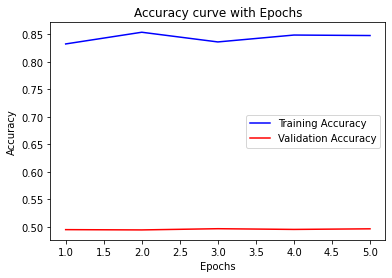

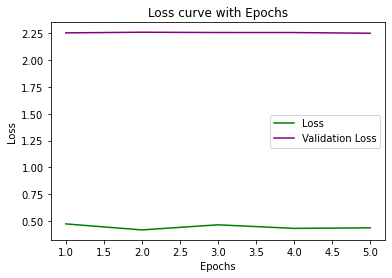

In [44]:
# Plotting and Visualising

lenet5cifar10acc = c.history["accuracy"]
lenet5cifar10val_acc = c.history["val_accuracy"]
lenet5cifar10lss = c.history["loss"]
lenet5cifar10val_lss = c.history["val_loss"]
epochs_list = [1,2,3,4,5]

#Accuracy Plot
plt.plot(epochs_list, lenet5cifar10acc, 'blue', label='Training Accuracy')
plt.plot(epochs_list, lenet5cifar10val_acc, 'red', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy curve with Epochs')
plt.legend()
plt.show()

#Loss PLot
plt.plot(epochs_list, lenet5cifar10lss, 'green', label="Loss")
plt.plot(epochs_list, lenet5cifar10val_lss, 'purple', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve with Epochs')
plt.legend()
plt.show()

This is the case of Overfitting

In [45]:
lenet5cifar10model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.2784 - accuracy: 0.4975


[2.2783970832824707, 0.4975000023841858]

Testing Accuracy = 49.75%

In [28]:
y_pred_lenet5cifar10 = lenet5cifar10model.predict(x_test)
y_pred_lenet5cifar10

array([[7.15701431e-02, 1.16217406e-02, 4.10088226e-02, ...,
        1.12924865e-02, 4.78742905e-02, 2.15993933e-02],
       [2.72238068e-02, 4.44986790e-01, 2.61230336e-04, ...,
        1.61828375e-05, 4.71624613e-01, 5.54063693e-02],
       [1.27683282e-02, 6.63994849e-02, 7.52096646e-04, ...,
        7.13918198e-05, 8.80225599e-01, 3.79514284e-02],
       ...,
       [1.16090970e-02, 2.24852556e-04, 1.19801395e-01, ...,
        3.64751406e-02, 1.06112203e-02, 1.78455212e-03],
       [8.76838043e-02, 1.84335023e-01, 5.32812998e-02, ...,
        5.85710742e-02, 1.19543239e-01, 2.94141900e-02],
       [1.29867985e-03, 4.38923526e-05, 6.70546712e-03, ...,
        3.65378112e-01, 7.35838476e-05, 3.94357776e-04]], dtype=float32)

**On CIFAR-10 dataset**

Lenet-5 Architecture gives training accuracy (84.77%)
